## Integrantes

*Leidy Paola Guevara Diaz*

*Santiago Nova Acosta*

*David Sáenz Lancheros*

*Nelson Andrés Rodríguez*

*Martina García Mejía*

# Practical example: Series expansion of $e^{-x}$
The function $e^{-x}$ can be expanded as 
$$e^{-x} = \sum_{i=0}^{\infty} (-1)^i \frac{x^i}{i!} = 1 -  x + \frac{x^2}{2} - \frac{x^3}{6} + \ldots \ (|x| < \infty)$$

This is a great expansion, valid for all finite values of $x$. But, **what numerical problems do you see?**

Implement a function that receives $x$ and $N$ (max number of terms), and saves the iteration value of the series as a function of $i$ in a file called `sumdata.txt`. Then load the data and plot it. Use $N = 10000$ and $x=1.8766$. You will need to implement also a factorial function.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# use fout.write(f"...") to save the data 
def exp_expansion(x, N, fname):
    total = 0.0
    fout = open(fname, "w")
    for ii in range(N):
        total += np.power(-1.0,ii)*np.power(x,ii)/factorial(ii)
        fout.write(f"{ii},{total}\n")
    fout.close()
    return fout

def factorial(n):
    result = 1.0
    for ii in range(1,n+1):
        result *= ii
    return result

    
# Call the function  
exp_expansion(x=1.8766, N=100, fname="sumdata.txt")

<_io.TextIOWrapper name='sumdata.txt' mode='w' encoding='UTF-8'>

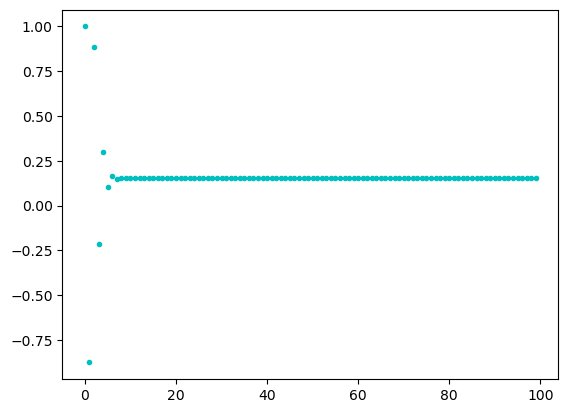

In [4]:
#%matplotlib notebook
# Plot the data
x, y = np.loadtxt('sumdata.txt', unpack = True, delimiter=',')
plt.plot(x, y, 'c.')

As you can see, there are many problems with this approach. When doing computational tasks, you cannot think that  you are doing maths, you need to think also about the computer. 

Now try to avoid the intrinsic overflows, underflows (and substractive cancelations) by reworking the sum term in a recurrent way: if 
$$a_i = (-1)^i \frac{x^i}{i!}$$
how could you write $a_{i+1}$ as a function of $a_i$? Thin about it and then check the next cell.


$$a_{i+1} = \frac{-x a_i}{i+1}$$


Now your task is to implement a second version using the recurrence function and compare the results with the first one. Write a function that prints `i expansion1 expansion2` and plot the. Is there any advantage on using the new form?

In [5]:
# use fout.write(f"...") to save the data 
def exp_expansion_new(x, N, fname):
    a_i = 1.0
    total1, total2 = (0.0, 0.0)
    exact = np.exp(-x)
    fout = open(fname, "w")
    for i in range(N+1):
      # Método 1
      total1 += np.power(-1.0,i)*np.power(x,i)/factorial(i)
      err1 = np.abs(100*(exact-total1))/(exact)
      # Método 2
      total2 += a_i
      a_i = -x*a_i/(i+1)
      err2 = 100*np.abs((exact-total2))/(exact)

      fout.write(f"{i},{total1},{total2},{err1},{err2}\n")
     
    fout.close()

# Call the NEW function  
exp_expansion_new(x=1.8766, N=2000, fname="sumdatanew.txt")

/tmp/ipykernel_603/4118116212.py:9: RuntimeWarning: overflow encountered in power
  total1 += np.power(-1.0,i)*np.power(x,i)/factorial(i)
/tmp/ipykernel_603/4118116212.py:9: RuntimeWarning: invalid value encountered in double_scalars
  total1 += np.power(-1.0,i)*np.power(x,i)/factorial(i)


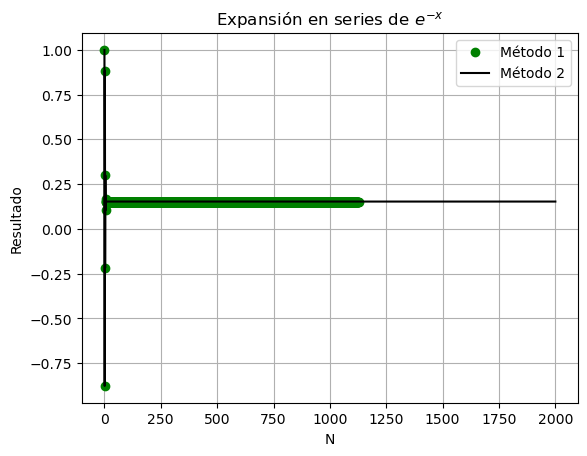

In [18]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np
x, y, z, a, b = np.loadtxt('sumdatanew.txt', unpack = True, delimiter=',')
plt.plot(x, y, 'go', label="Método 1")
plt.plot(x, z, 'k-', label="Método 2")
plt.legend()
plt.ylabel("Resultado")
plt.xlabel("N")
plt.title("Expansión en series de $e^{-x}$")
plt.grid()

Graficando los errores porcentuales:

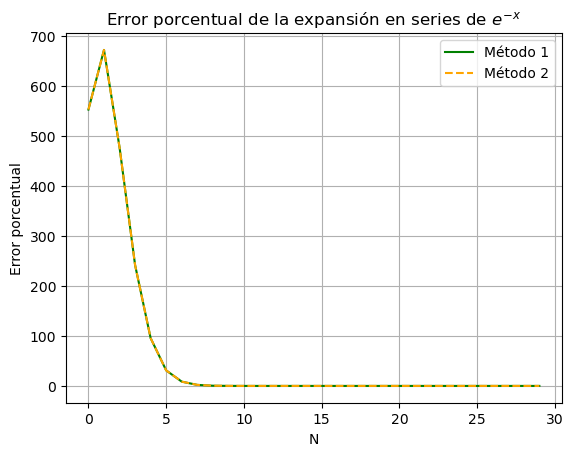

In [20]:
plt.plot(x[:30],a[:30], label="Método 1", color="green")
plt.plot(x[:30],b[:30], '--', label="Método 2", color="orange")
plt.xlabel("N")
plt.ylabel("Error porcentual")
plt.title("Error porcentual de la expansión en series de $e^{-x}$")
plt.grid('--')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


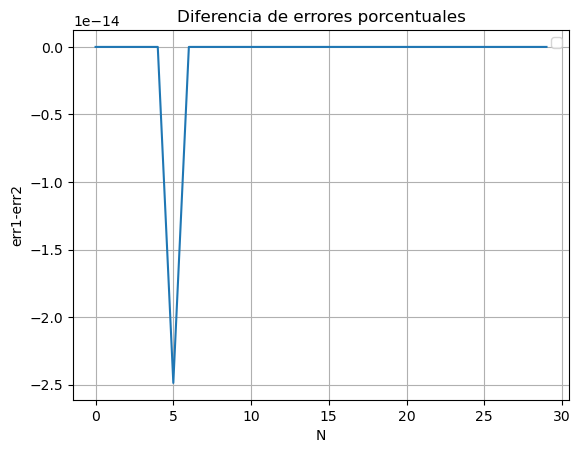

In [12]:
plt.plot(x[:30],a[:30]-b[:30])
plt.title("Diferencia de errores porcentuales")
plt.xlabel("N")
plt.ylabel("err1-err2")
plt.grid()
plt.legend()

Vemos que los errores siguen tendiendo a cero con N más grande:

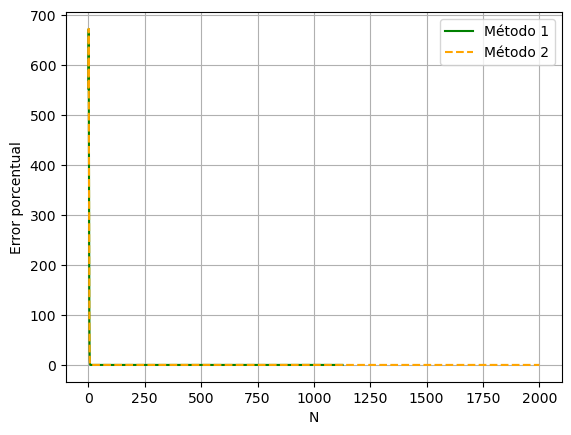

In [15]:
plt.plot(x,a, label="Método 1", color="green")
plt.plot(x,b, '--', label="Método 2", color="orange")
plt.xlabel("N")
plt.ylabel("Error porcentual")
plt.grid('--')
plt.legend()